In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine(f"sqlite:///Resources/hawaii.sqlite")
conn = engine.raw_connection()

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
M=Base.classes.measurement
S=Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
session.query(M.date).order_by(M.date.desc()).first()

('2017-08-23',)

2017-08-23
2016-08-23


<BarContainer object of 2223 artists>

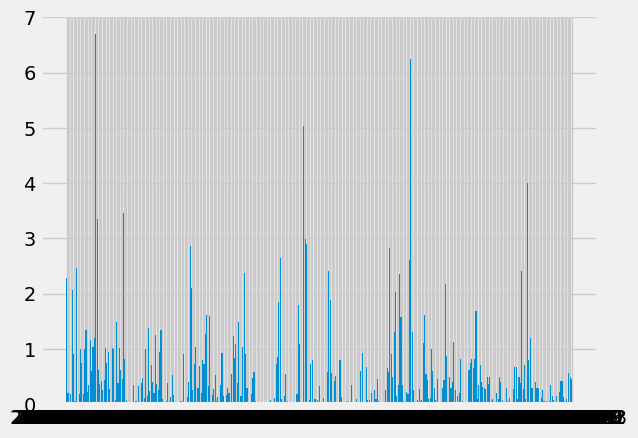

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
import datetime as dt
# Starting from the most recent data point in the database. 
latest = dt.date(2017, 8, 23)
print(latest)
# Calculate the date one year from the last date in data set.
from dateutil.relativedelta import relativedelta

year_ago = latest - relativedelta(years=1)
print(year_ago)
# Perform a query to retrieve the data and precipitation scores
prcp_past_year = session.query(M.date,M.prcp).\
    filter(M.date > year_ago).\
    order_by(M.date.asc()).all()
    

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(prcp_past_year, columns=['Date', 'Inches'])



# Sort the dataframe by date
df.sort_values('Date')
df.head(10000)

# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots()
x_values = df['Date']
y_values = df['Inches']
plt.bar(x_values, y_values)


In [12]:
df.sort_values('Date')
df.head(10000)

,Date,Inches
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
...,...,...
2218,2017-08-22,0.50
2219,2017-08-23,0.00
2220,2017-08-23,0.00
2221,2017-08-23,0.08


In [13]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()


,Inches
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number of stations in the dataset
session.query(S.station).count()

9

In [15]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(M.station, func.count(M.station)).\
    group_by(M.station).\
    order_by(func.count(M.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
print('The most active station is Waihee Station')

The most active station is Waihee Station


In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(M.tobs), func.max(M.tobs), func.avg(M.tobs)).\
    filter(M.station == 'USC00519281').\
    group_by(M.station).all()


[(54.0, 85.0, 71.66378066378067)]

In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_past_year = session.query(M.tobs).\
    filter(M.date > year_ago).\
    filter(M.station == 'USC00519281').\
    order_by(M.tobs.asc()).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df2 = pd.DataFrame(tobs_past_year, columns=['Temp'])
df2.head(351)





,Temp
0,59.0
1,59.0
2,59.0
3,60.0
4,60.0
...,...
346,81.0
347,82.0
348,82.0
349,82.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


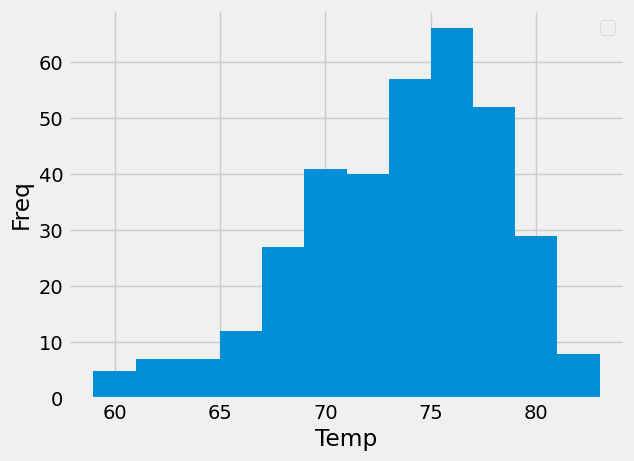

In [19]:
# Use Pandas Plotting with Matplotlib to plot the data

x_values = df2['Temp']

plt.hist(x_values, bins = 12)
plt.xlabel('Temp')
plt.ylabel('Freq')
plt.legend(loc="upper right")

# Close Session

In [20]:
# Close Session
session.close()